Adrianna Janik, Upasana Biswas, Ponathipan Jawahar

# Allstate claims severity - Kaggle challenge

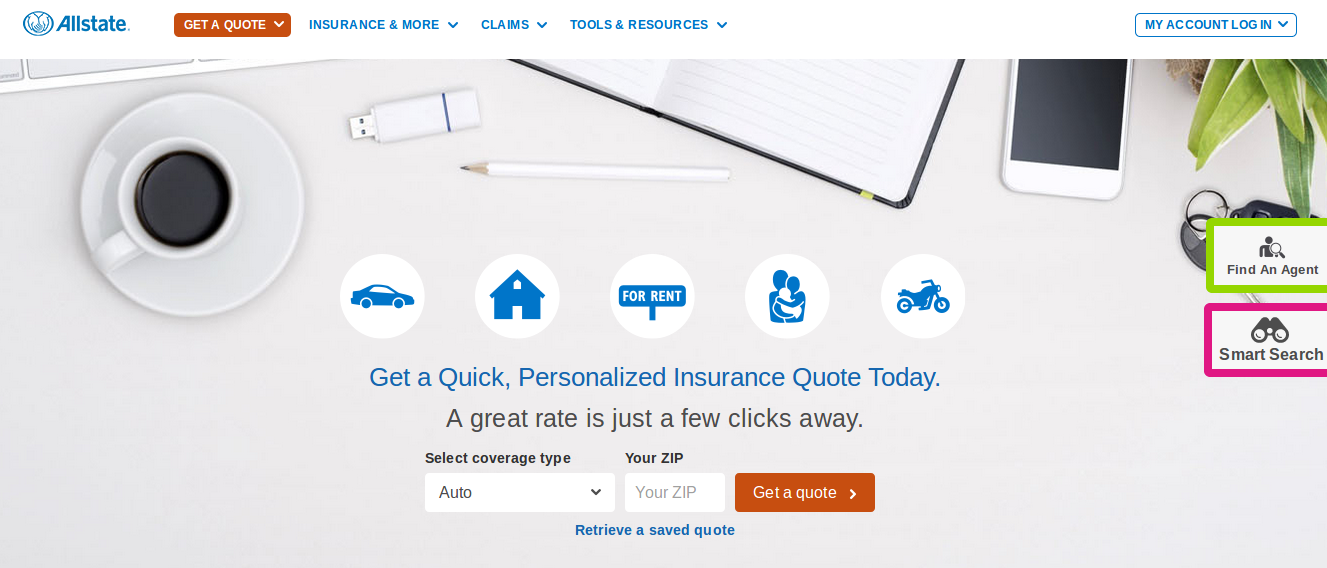

## Goal 
Assessment of insurance claim loss, which depicts the severity of a given case, based on anonymized data about the case details. 

## Introduction
A car accident, and accidental fire on house or the death of a loved one, any of these randomly happening in a person's life is capable of turning his life around. Generally speaking, in terms of money or time or mental condition, filling claim forms and pushing with the insurance agent is the least we will want to do then. A probable solution of this can be an automated system  which will do manual jobs of claim estimation based on the severity of the case and spare the victims from this headache. 

Allstate, a personal insurer in the United States, is continuously seeking new and better ideas to improve their claims service for an over 16 million households they protect. It is currently developing automated methods of predicting the cost of the benefits the vistims are supposed to receive.

In this recruitment challenge, Kagglers are expected to show off their creativity and flex their technical abilities by creating an algorithm which accurately predicts claims severity.  We are trying here to develop or improve a model which would predict claims severity.


## Problem Type
Supervised Regression with continuous and categorical data

## Content:
1. Housekeeping and Imports
2. Data Loading
3. Data Exploration
4. Visualization
5. Data Cleaning
6. Feature Engineering
7. Data Transformation and Preparation
8. Model Exploration
9. Conclusions
10. References



## 1. Housekeeping and Imports

For importing libraries necessary for the project, and for basic preprocessing functions (ex: typset conversion for NLP projects). 

In [16]:
install.packages('caTools')
install.packages('data.table')
install.packages('Matrix')
install.packages('Metrics')
install.packages("xgboost")
install.packages("corrplot")
install.packages("magrittr")
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("ggplot2")
install.packages(c("FactoMineR","factoextra"))
install.packages("e1071")
install.packages("PCAmixdata")

Installing package into ‘/home/adri/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/adri/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [1]:
library(data.table)
library(Matrix)
library(xgboost)
library(Metrics)
library(magrittr)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(nortest)
library(PCAmixdata)
library(caTools)
library(FactoMineR)
library(factoextra)
library(e1071)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ tidyr::expand()    masks Matrix::expand()
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::set_names() masks magrittr::set_names()
✖ dplyr::slice()     masks xgboost::slice()
✖ purrr::transpose() masks data.table::transpose()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


## 2. Data Loading

For loading data files into appropriate variables.

In [2]:
ID = 'id'
TARGET = 'loss'
SEED = 0

TRAIN_FILE = "../train.csv"
TEST_FILE = "../test.csv"
SUBMISSION_FILE = "../sample_submission.csv"

# Reads a file in table format and creates a data frame from it, 
# with cases corresponding to lines and variables to fields in the file.

train = fread(TRAIN_FILE, showProgress = TRUE)
train$id = NULL
test = fread(TEST_FILE, showProgress = TRUE)

## 3. Data Exploration

### Example Records

In [21]:
head(train, n = 10)

cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,⋯,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
A,B,A,B,A,A,A,A,B,A,⋯,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
A,B,A,A,A,A,A,A,B,B,⋯,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
A,B,A,A,B,A,A,A,B,B,⋯,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
B,B,A,B,A,A,A,A,B,A,⋯,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
A,B,A,B,A,A,A,A,B,B,⋯,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
A,B,A,A,A,A,A,A,B,A,⋯,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
A,A,A,A,B,A,A,A,A,A,⋯,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
A,B,A,B,A,A,A,A,B,A,⋯,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
A,B,B,B,B,A,A,A,B,B,⋯,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
A,B,A,A,B,B,A,A,B,A,⋯,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [22]:
dim(train) # dimensions of train data

[1] 188318    131

### Data-types conversion

In [23]:
sapply(train, class) # data types of each feature

cat1        cat2        cat3        cat4        cat5        cat6 
"character" "character" "character" "character" "character" "character" 
       cat7        cat8        cat9       cat10       cat11       cat12 
"character" "character" "character" "character" "character" "character" 
      cat13       cat14       cat15       cat16       cat17       cat18 
"character" "character" "character" "character" "character" "character" 
      cat19       cat20       cat21       cat22       cat23       cat24 
"character" "character" "character" "character" "character" "character" 
      cat25       cat26       cat27       cat28       cat29       cat30 
"character" "character" "character" "character" "character" "character" 
      cat31       cat32       cat33       cat34       cat35       cat36 
"character" "character" "character" "character" "character" "character" 
      cat37       cat38       cat39       cat40       cat41       cat42 
"character" "character" "character" "character" "character" "character" 
      cat43       cat44       cat45       cat46       cat47       cat48 
"character" "character" "character" "character" "character" "character" 
      cat49       cat50       cat51       cat52       cat53       cat54 
"character" "character" "character" "character" "character" "character" 
      cat55       cat56       cat57       cat58       cat59       cat60 
"character" "character" "character" "character" "character" "character" 
      cat61       cat62       cat63       cat64       cat65       cat66 
"character" "character" "character" "character" "character" "character" 
      cat67       cat68       cat69       cat70       cat71       cat72 
"character" "character" "character" "character" "character" "character" 
      cat73       cat74       cat75       cat76       cat77       cat78 
"character" "character" "character" "character" "character" "character" 
      cat79       cat80       cat81       cat82       cat83       cat84 
"character" "character" "character" "character" "character" "character" 
      cat85       cat86       cat87       cat88       cat89       cat90 
"character" "character" "character" "character" "character" "character" 
      cat91       cat92       cat93       cat94       cat95       cat96 
"character" "character" "character" "character" "character" "character" 
      cat97       cat98       cat99      cat100      cat101      cat102 
"character" "character" "character" "character" "character" "character" 
     cat103      cat104      cat105      cat106      cat107      cat108 
"character" "character" "character" "character" "character" "character" 
     cat109      cat110      cat111      cat112      cat113      cat114 
"character" "character" "character" "character" "character" "character" 
     cat115      cat116       cont1       cont2       cont3       cont4 
"character" "character"   "numeric"   "numeric"   "numeric"   "numeric" 
      cont5       cont6       cont7       cont8       cont9      cont10 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
     cont11      cont12      cont13      cont14        loss 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

In [3]:
train <- train %>% mutate_if(is.character,as.factor) # conversion of categorical type from character to factor
test <- test %>% mutate_if(is.character,as.factor)

### Missing values

In [25]:
if (sum(is.nan(as.matrix(train)))==0){
    print('No Values Missing')
}

[1] "No Values Missing"


### Descriptive Statistics

In [26]:
summary(train)

 cat1       cat2       cat3       cat4       cat5       cat6       cat7      
 A:141550   A:106721   A:177993   A:128395   A:123737   A:131693   A:183744  
 B: 46768   B: 81597   B: 10325   B: 59923   B: 64581   B: 56625   B:  4574  
                                                                             
                                                                             
                                                                             
                                                                             
                                                                             
 cat8       cat9       cat10      cat11      cat12      cat13      cat14     
 A:177274   A:113122   A:160213   A:168186   A:159825   A:168851   A:186041  
 B: 11044   B: 75196   B: 28105   B: 20132   B: 28493   B: 19467   B:  2277  
                                                                             
                                                                

We can see that some continous variables have a very big variation between median and mean which means that there are outliers available in the dataset.

### Standard deviation of variables

In [27]:
# This calculates the standard deviation for each numeric attribute in the dataset.
sapply(train[,118:131], sd)

cont2        cont3        cont4        cont5        cont6        cont7 
   0.2072017    0.2021046    0.2112922    0.2090268    0.2052726    0.1784502 
       cont8        cont9       cont10       cont11       cont12       cont13 
   0.1993705    0.1816602    0.1858767    0.2097365    0.2094266    0.2127772 
      cont14         loss 
   0.2224875 2904.0861864

## 4. Visualizaton

#### Bar charts for categorical variables distribution

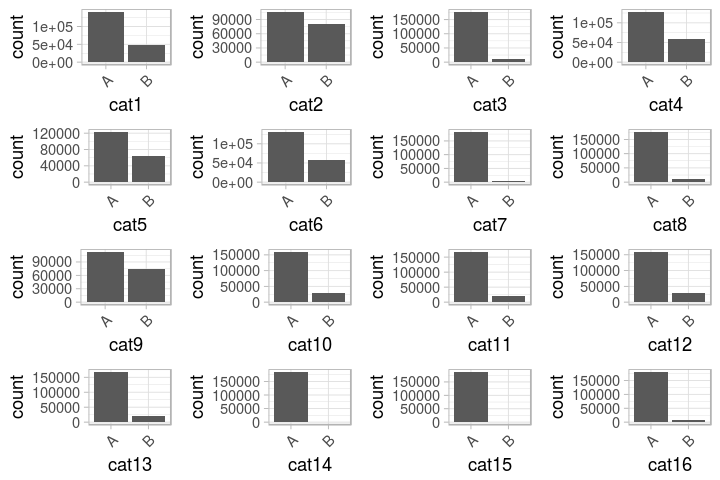

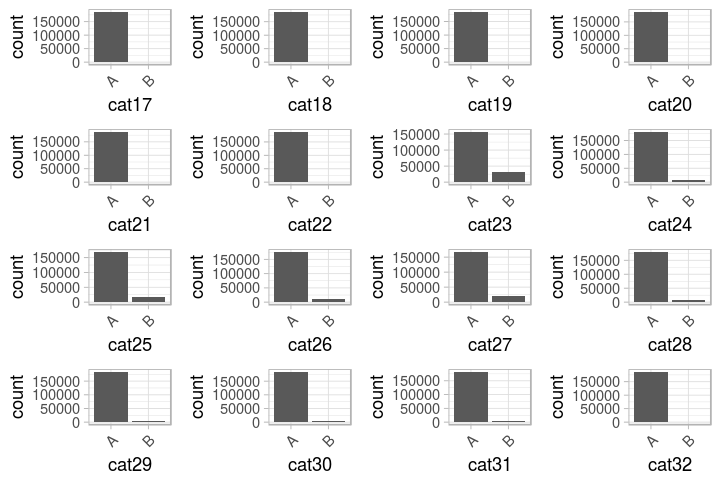

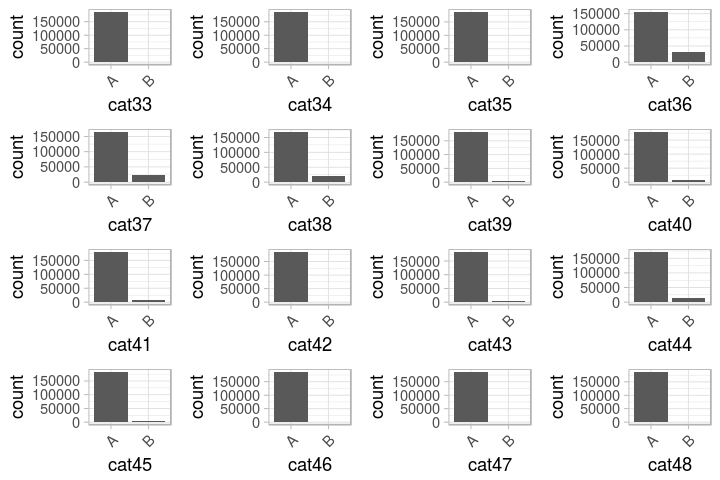

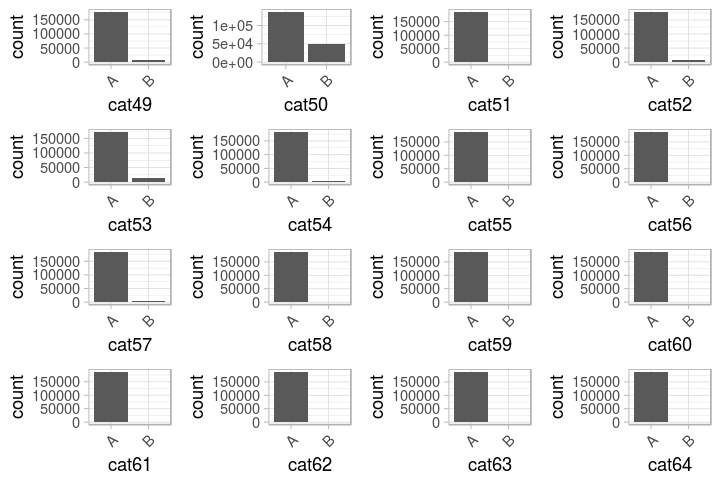

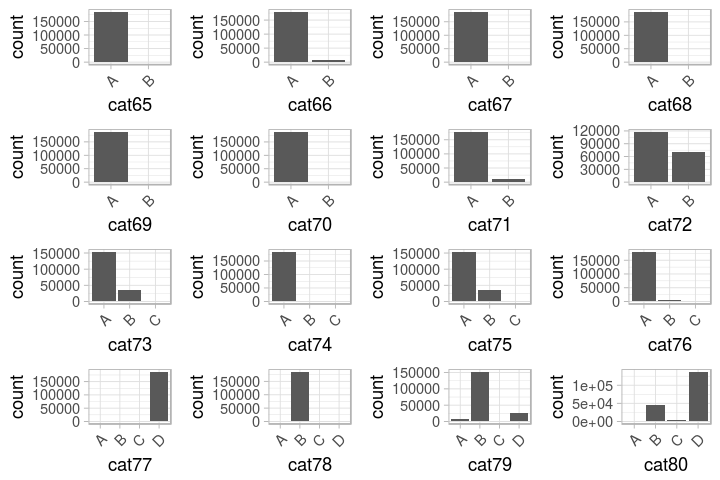

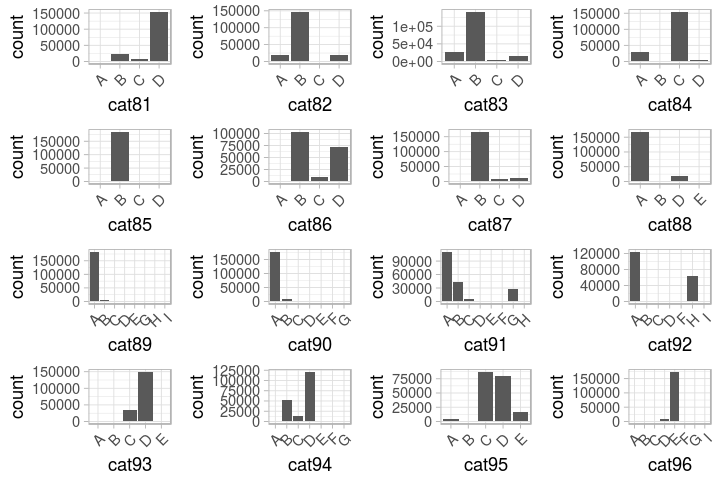

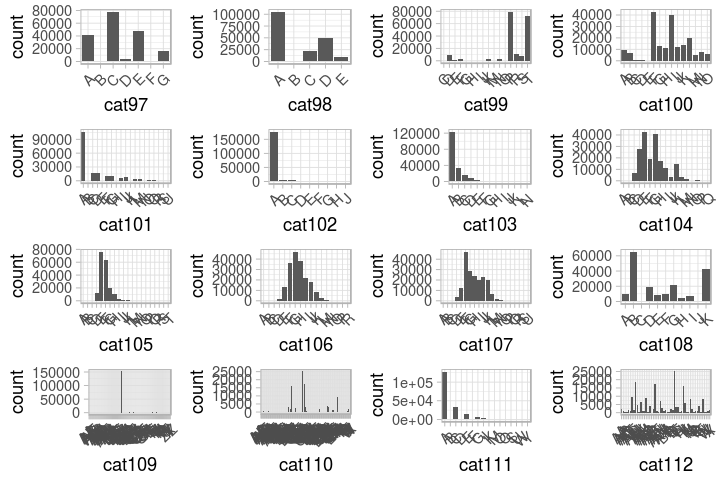

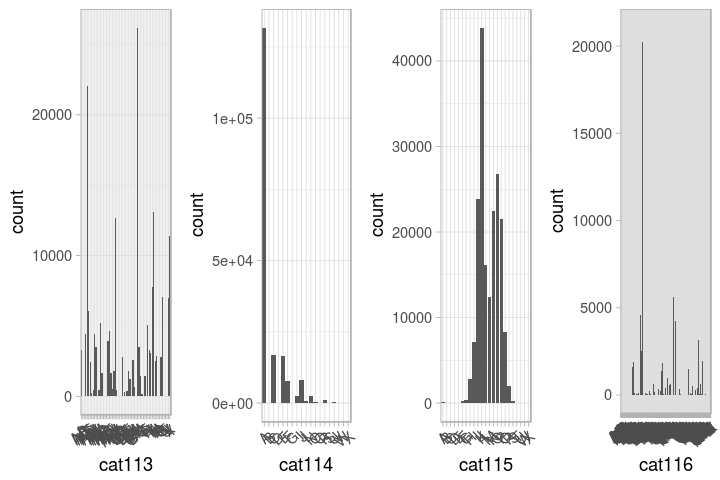

In [28]:
plotHist <- function(data_in, i) {
  data <- data.frame(x=data_in[[i]])
  p <- ggplot(data=data, aes(x=factor(x))) + stat_count() + xlab(colnames(data_in)[i]) + theme_light() + 
    theme(axis.text.x = element_text(angle = 45, hjust =1))
  return (p)
}

doPlots <- function(data_in, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

doPlots(train, fun = plotHist, ii = 1:16, ncol = 4)    
doPlots(train, fun = plotHist, ii = 17:32, ncol = 4)    
doPlots(train, fun = plotHist, ii = 33:48, ncol = 4)    
doPlots(train, fun = plotHist, ii = 49:64, ncol = 4)    
doPlots(train, fun = plotHist, ii = 65:80, ncol = 4)    
doPlots(train, fun = plotHist, ii = 81:96, ncol = 4)    
doPlots(train, fun = plotHist, ii = 97:112, ncol = 4)    
doPlots(train, fun = plotHist, ii = 113:116, ncol = 4) 

#### Histograms for continuous variables

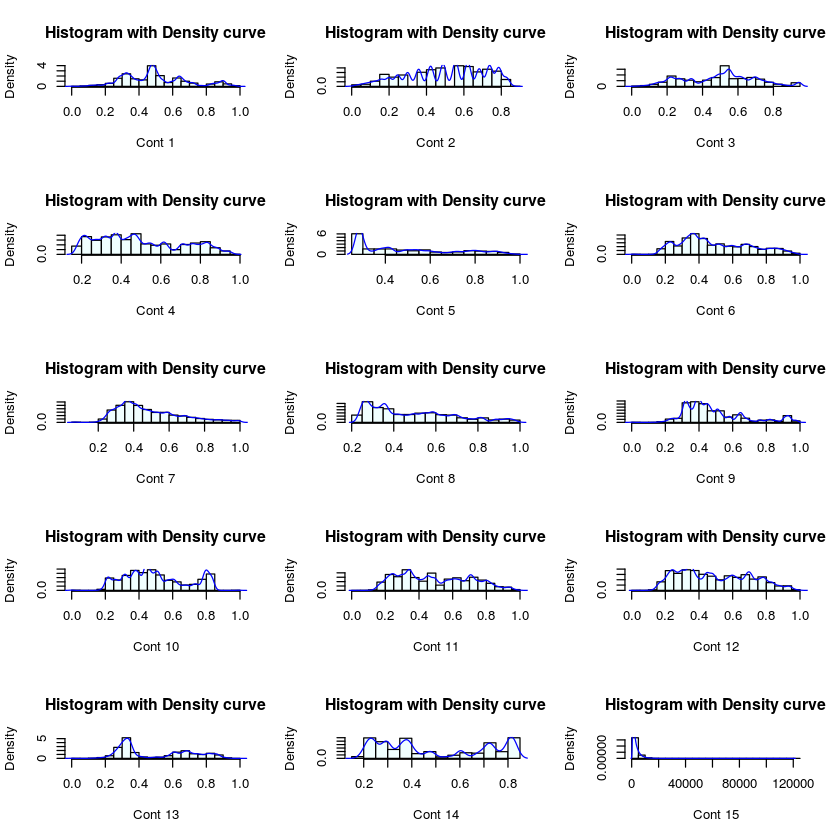

In [3]:
par(mfrow=c(5,3))
for (i in 117:131) {
    x = as.numeric(unlist(train[[i]]))
    #generate hist
    hist(x,
         main="Histogram with Density curve",
         col='azure', 
         xlab=paste("Cont",i-116),
         prob=TRUE)
    #generate density plot
    lines(density(x),
         col='blue') 
}

## Normality Testing of continuous variables
We have fourteen columns of continuous data of approximately 180000 rows. Our aim is to test if the data are normally distributed. By the "Central Limit Theorem", we know that no matter what distribution the data have, the sampling distribution tends to be normal if the sample is large enough (n > 30). Here our dataset is very large and according to the theorem, distribution should tend to normality. We will do both Hypothesis testing as well as visual inspection to come to a conclusion:

#### Visual Inspection
1. Plot Normal Histogram 
2. Skewness Measure
3. Kurtosis Measure

#### Null Hypothesis Test
The visual inspection, we did previously, is generally unreliable. So we can use a significance test comparing the sample distribution to a normal one in order to ascertain extent of data deviation from normality.

    Null hypothesis: Sample distribution is normal. 
    Alternate hypothesis: Sample distribution is not normal.
Method Used:
We are using Anderson-Darling normality test as it is widely recommended for normality test.

#### Observation
From the output, the p-value < 0.05 implying that the distribution of the data are significantly different from normal distribution. In other words, we can assume that the distribution is not normal.

#### Loss variable distribution and Box plots for continous variables

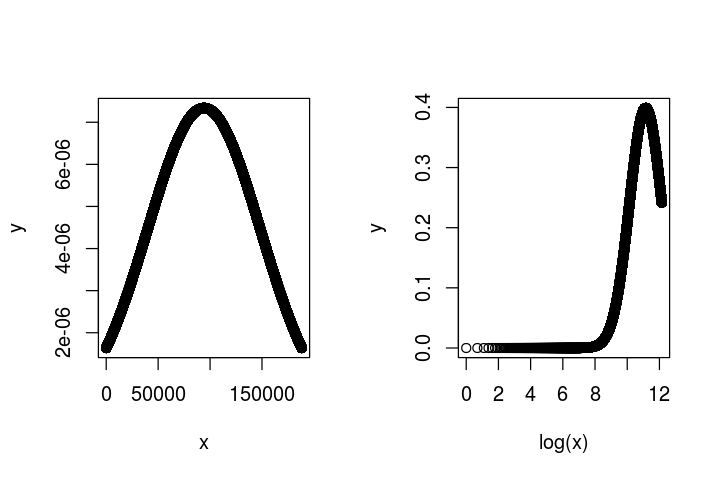

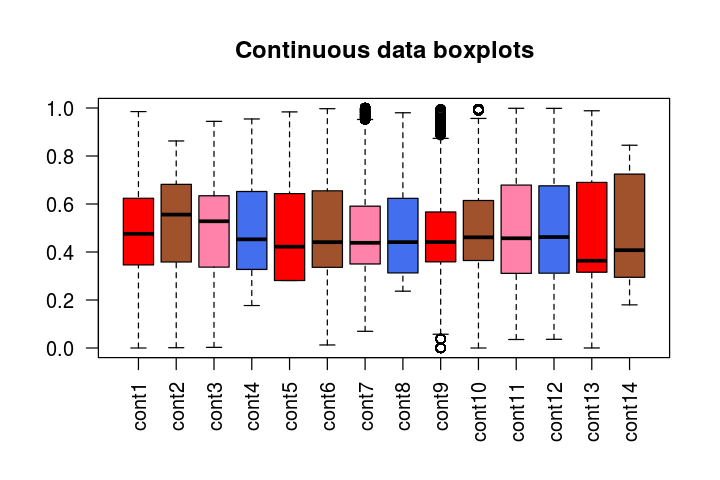

In [20]:
#extract continuous variables
dfCont = data.frame(row.names=1:nrow(train))
for(i in 1:length(train)){
    if (sapply(train[i], is.numeric) == TRUE){
        #contCol = list.append(contCol,head(df[i],n=0))
        dfCont = cbind(dfCont,train[i])
        }
    }

##check if the loss column has normal distribution - yes it has
x = dfCont['loss']
loss = dfCont['loss']
x = seq(x[-1,])
y = dnorm(x, mean = mean(x), sd = sd(x))
par(mfrow=c(1,2))
options(repr.plot.width=6, repr.plot.height=4)
plot(x,y)

#apply lognormal to reduce the scale and control negative values
y = dnorm(log(x), mean = mean(log(x)), sd = sd(log(x)))
plot(log(x),y)

#get the categorical values
dfAlph = data.frame(row.names=1:nrow(train))
for(i in 1:length(train)){
    if (sapply(train[i], is.numeric) == FALSE){
        #contCol = list.append(contCol,head(df[i],n=0))
        dfAlph = cbind(dfAlph,train[i])
        }
    }

#draw boxplots for them
#delete loss column or else huge outliers there
dfCont[length(dfCont)] = NULL
par(mfrow=c(1,1))
boxplot(dfCont, las=2, main="Continuous data boxplots", col=c("red","sienna","palevioletred1","royalblue2","red","sienna","palevioletred1","royalblue2","red","sienna","palevioletred1","royalblue2"))


In [21]:
ad.test(dfCont$cont1)
ad.test(dfCont$cont2)
ad.test(dfCont$cont3)
ad.test(dfCont$cont4)
ad.test(dfCont$cont5)
ad.test(dfCont$cont6)
ad.test(dfCont$cont7)
ad.test(dfCont$cont8)
ad.test(dfCont$cont9)
ad.test(dfCont$cont10)
ad.test(dfCont$cont10)
ad.test(dfCont$cont11)
ad.test(dfCont$cont12)
ad.test(dfCont$cont13)
ad.test(dfCont$cont14)


	Anderson-Darling normality test

data:  dfCont$cont1
A = 2122.5, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont2
A = 2270.8, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont3
A = 1056.9, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont4
A = 3149.6, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont5
A = 8960.5, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont6
A = 2668.7, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont7
A = 3728.5, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont8
A = 4485.7, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont9
A = 6716.6, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont10
A = 2923.2, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont10
A = 2923.2, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont11
A = 2613.8, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont12
A = 2537.5, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont13
A = 9874.1, p-value < 2.2e-16



	Anderson-Darling normality test

data:  dfCont$cont14
A = 8368.6, p-value < 2.2e-16


### Investigating correlations between features

corrplot 0.84 loaded


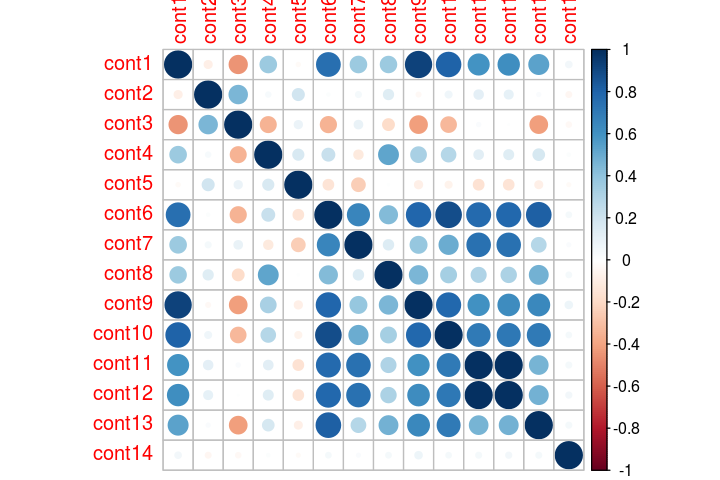

In [22]:
#correlation between continuous features including loss
scaled.dfCont = scale(dfCont)     #normalize
#zVar <- (corrM - mean(corrM)) / sd(corrM)     #z-transformation
corrM = cor(dfCont)
library(corrplot)
corrplot(corrM, method="circle")

We can see that many variables are highly correlated with each others this means that we can reduce number of continous variables for example using PCA.

### Outlier Detection

The presence of outliers can often skew results which take into consideration these data points. 

One approach to detect outliers is to use Tukey's Method for identfying them: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.
This has been discussed in the next step.

## 5. Data Cleaning

Outliers might affect the output of an algorithm, that why it is important to investigate their influence on the model creation. For this purpose we identified outliers and created two models including and excluding outliers.

In case of severity claims in insurance company we can be sure that assesment of an accident had been performed carefully especially in the case of upper-bound correct outstanding values that resamble very severe case we should not ignore those cases but we have no knowledge about how the data was collected so we cannot assume that the data is error-free for for example typing errors.

We will remove Outliers using Tukey's rule:

In [23]:
removeOutliers <- function(x) {
    ## Find 25% and 75% Quantiles using inbuild function
    quant <- quantile(x, probs=c(.25, .75), na.rm = TRUE)
  
    ## Find Interquantile range and multiply it by 1.5 
    ## to derive factor for range calculation
    H <- 1.5 * IQR(x, na.rm = TRUE)
    y <- x
  
    ## fill the outlier elements with NA
    y[x < (quant[1] - H)] <- NA
    y[x > (quant[3] + H)] <- NA
 
    return(y)
}

In [24]:
for(i in 1:length(dfCont)) {
    dfCont[[i]] <- removeOutliers(dfCont[[i]])
}

## 6. Feature Engineering

As the dataset is being anonimized we are not able to apply business knowledge to select specific features based on that, therefore we moved to the next step.

## 7. Data Transformation and Preparation

### Normalizing and Scaling Numerical Features 

One common practice is to perform some type of scaling on numerical features. Applying scaling doesn't change the shape of each feature's distribution; but ensures that each feature is treated equally when applying supervised learners.

In our case all of numerical features are already between 0 and 1 value so there is no need for scaling.

### One Hot Encoding Categorical Features

### Dimensionality reduction
#### Principal component Analysis
We use Principal component analysis (PCA) to reduce the dimensionality of our model.
It is mainly used for two purposes.

1) It allows us to summarize and to visualize the information in a data set containing individuals/observations described by multiple inter-correlated quantitative variables.

2) It is used to extract the important information from a multivariate data table and to express this information as a set of few new variables called principal components. This is what we called dimensionality reduction.

These new variables obtained from PCA correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables. The information in a given data set corresponds to the total variation it contains.

#### Multiple correspondence Analysis
The Multiple correspondence analysis (MCA) is an extension of the simple correspondence analysis for summarizing and visualizing a data table containing more than two categorical variables.
It can also be seen as a generalization of principal component analysis when the variables to be analysed are categorical instead of quantitative.
We will be using MCA here to reduce the dimension of categorical variables.

#### How many principal components you should choose?
The thumb rule is we need see the cumulative propotion of each component, 

#### Observation
Here we consider only the dimensions which retains the data for which the cumulative propotion is 90 percent. 
So we select 25 pincipal components from here.

In [25]:
bincat1_all = dfAlph[ ,1:72]
cat2_all =dfAlph[,73:98]
cat3_all = dfAlph[ ,99:116]

# Converting the matrix to numeric 
bincat1_all<- sapply(bincat1_all, as.numeric)
head(bincat1_all)

#reducing dimensions
pca1<- prcomp(bincat1_all, scale=F)

summary(pca1)

cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,⋯,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72
1,2,1,2,1,1,1,1,2,1,⋯,1,1,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,2,2,⋯,1,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,1,1,2,2,⋯,1,1,1,1,1,1,1,1,1,1
2,2,1,2,1,1,1,1,2,1,⋯,1,1,1,1,1,1,1,1,1,1
1,2,1,2,1,1,1,1,2,2,⋯,1,1,1,1,1,1,1,1,1,2
1,2,1,1,1,1,1,1,2,1,⋯,1,1,1,1,1,1,1,1,1,2


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.8886 0.6914 0.60160 0.51273 0.42915 0.40401 0.36849
Proportion of Variance 0.2056 0.1245 0.09426 0.06847 0.04796 0.04251 0.03536
Cumulative Proportion  0.2056 0.3301 0.42440 0.49287 0.54083 0.58334 0.61870
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.3543 0.31829 0.30883 0.27913 0.26828 0.25957 0.25616
Proportion of Variance 0.0327 0.02638 0.02484 0.02029 0.01874 0.01755 0.01709
Cumulative Proportion  0.6514 0.67778 0.70262 0.72291 0.74166 0.75920 0.77629
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.25356 0.23487 0.22871 0.22038 0.21883 0.20411 0.20140
Proportion of Variance 0.01674 0.01437 0.01362 0.01265 0.01247 0.01085 0.01056
Cumulative Proportion  0.79304 0.80740 0.82103 0.83368 0.84615 0.85700 0.86756
                          PC22    PC23

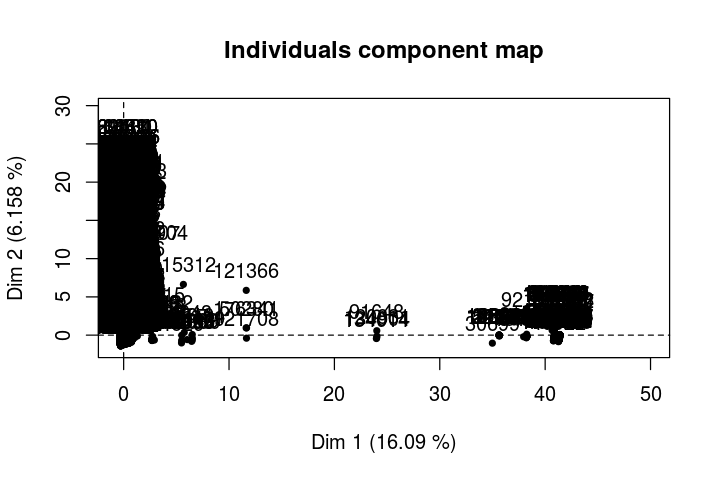

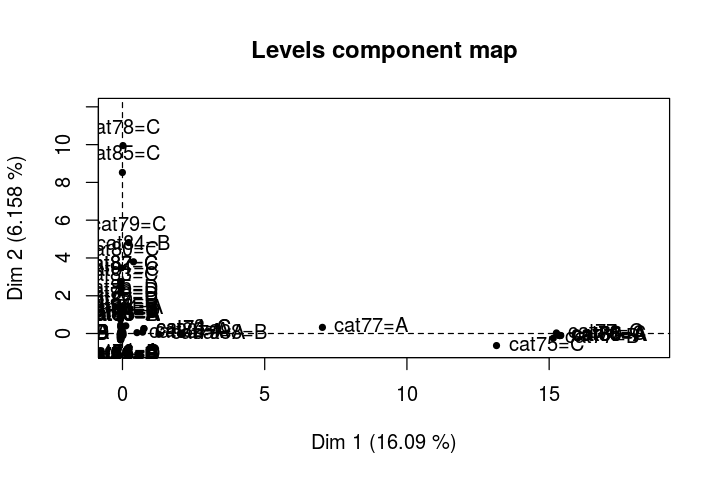

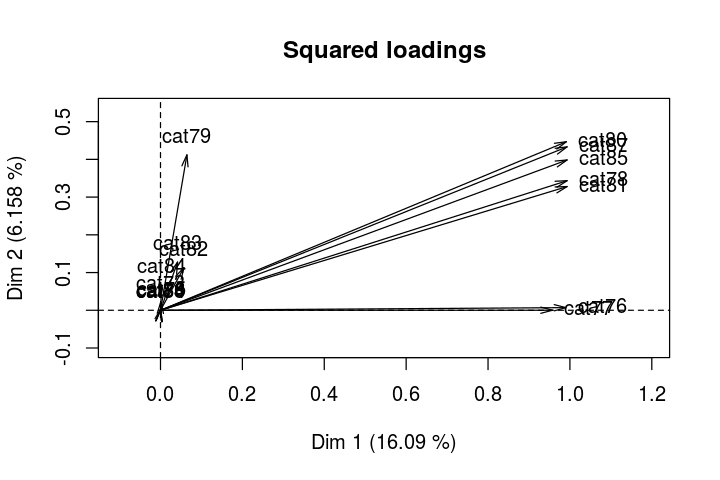

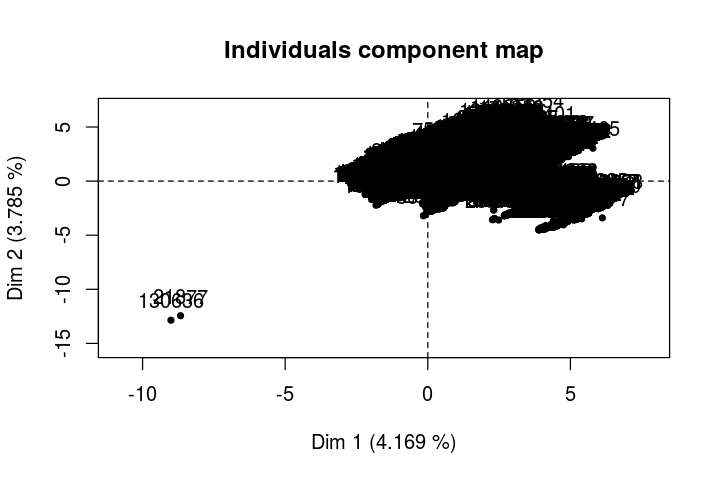

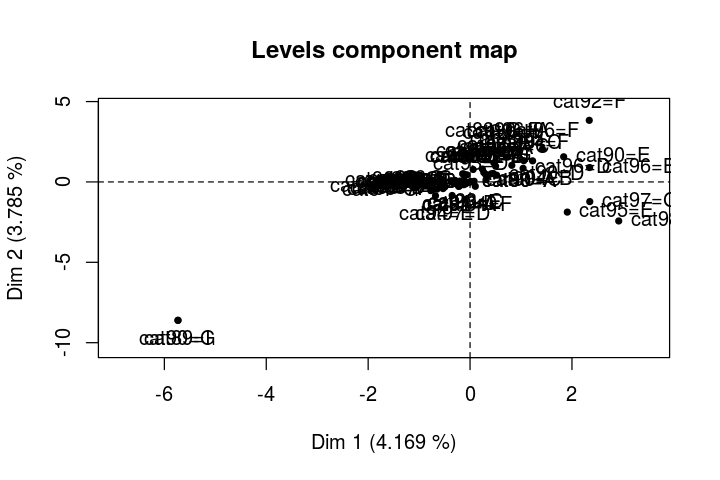

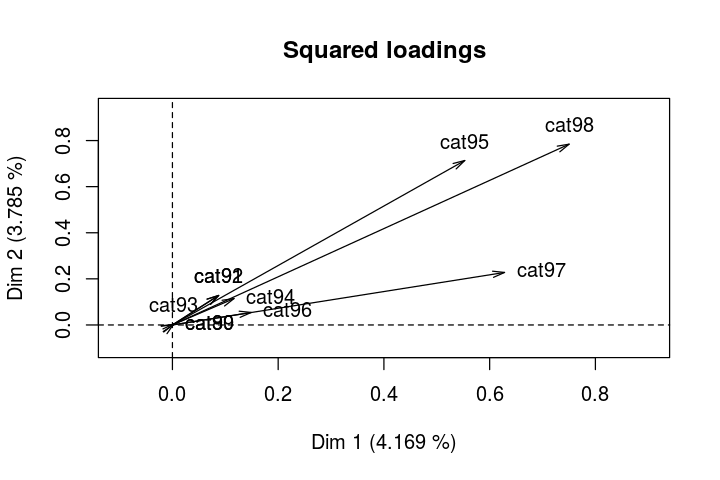

In [26]:
cat1_all =dfAlph[,73:88]
cat2_all = dfAlph[ ,89:98]

pca_cat1_all = PCAmix(X.quali = cat1_all , ndim = 30, rename.level = TRUE)
pca_cat2_all = PCAmix(X.quali = cat2_all , ndim = 50, rename.level = TRUE)
### Dimensionality reduction

## 8. Model Exploration

### Gradient boosted decision trees

We tried out many kaggle kernels for this challenge and majority and once with best performance used XGBoost implementation of gradient boosted decision trees, that is why we decided to use this algorithm.

### Baseline model

#### Naive Predictor Performance

First naive baseline model would be to predict loss by taking the central measure of loss, so for each observation we will predict the mean of loss. 

In [28]:
system.time({
loss = log(train$loss)
dummy_prediction = rep(mean(unlist(loss)),length(loss))
})

   user  system elapsed 
  0.024   0.000   0.022 

In [29]:
eval_mae <- function (yhat, y) {
   err= mae(exp(unlist(yhat)),exp(unlist(y)) )
   return(err)
}
print(eval_mae(dummy_prediction, loss))


[1] 1809.837


#### Multiple Linear Regression Model

In [4]:
system.time({
train = read.csv("../train.csv", header = T)
train$id = NULL
    
#inserting 
#to get the mean absolute error
eval_mae <- function (y_pred, y) {
   err= mae(exp(y_pred),exp(y))
   return(err)
}
cont_vars_all = train[,118:131]

#dataset with id removed
df <- train
##get the categorical values
dfcate = data.frame(row.names=1:nrow(df))
for(i in 1:length(df)){
    if (sapply(df[i], is.numeric) == FALSE){
        dfcate = cbind(dfcate,df[i])
        }
    }
#integer encoding categorical variables
dfcatenum <- sapply(dfcate, as.numeric)
#converting integer encoded matrix to dataframe

dfcatenum <- as.data.frame(dfcatenum)
#combining the encoded categorical dataframe with continous dataframe

dfcatcon= cbind(dfcatenum,cont_vars_all)
#removed correlated varaibles cont9,cont10,cont11,cont13
dfcatcon1= dfcatcon[,-c(125,126,128,129)]

dfcatcon1$loss = log(dfcatcon1$loss)
final_train = dfcatcon1

#splitting the final train set to validation set 
#splitting training into 2- train and valid

set.seed(123)
split = sample.split(final_train$loss, SplitRatio = 0.8)
training_set = subset(final_train, split == TRUE)
validation_set = subset(final_train, split == FALSE)
#Inserting MLR model

regressor = lm(formula = loss ~ .,
               data = training_set)

#predicting test results
y_pred = predict(regressor,newdata = validation_set)
#how you are the tsesting 
y <- validation_set$loss

#inserting 
#to get the mean absolute error
eval_mae <- function (y_pred, y) {
   err= mae(exp(y_pred),y)
   return(err)
}

print(eval_mae(y_pred,y))
})

[1] 2622.392


   user  system elapsed 
 22.132   0.128  22.267 

In [5]:
summary(regressor)


Call:
lm(formula = loss ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6455 -0.3760  0.0066  0.3862  3.1835 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.642e+01  7.664e+00   6.057 1.39e-09 ***
cat1        -1.729e-01  3.865e-03 -44.734  < 2e-16 ***
cat2         1.567e-01  9.489e-03  16.518  < 2e-16 ***
cat3         1.226e-01  2.594e-02   4.728 2.26e-06 ***
cat4        -3.119e-02  8.076e-03  -3.863 0.000112 ***
cat5         4.718e-02  6.295e-03   7.495 6.64e-14 ***
cat6        -1.857e-01  9.962e-03 -18.636  < 2e-16 ***
cat7         8.541e-02  4.371e-02   1.954 0.050682 .  
cat8         4.471e-02  2.447e-02   1.827 0.067648 .  
cat9         1.878e-02  1.635e-02   1.148 0.250767    
cat10        8.663e-02  1.491e-02   5.811 6.21e-09 ***
cat11        5.270e-02  1.512e-02   3.485 0.000492 ***
cat12        2.752e-01  1.502e-02  18.327  < 2e-16 ***
cat13        4.458e-02  1.514e-02   2.944 0.003236 ** 
cat14       -5.

## XGBoost
XGBoost or eXtreme Gradient Boosting is an algorithm which implements gradient boosted decision trees designed for speed and performance. It is largely based on the technique of Gradient Boosting or multiple additive regression trees.

#### Boosting 
It is a machine learning algorithm for primarily reducing bias as well as variance in supervised learning and it converts weak learners to strong ones. 
The approach behind this is adding new models to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.
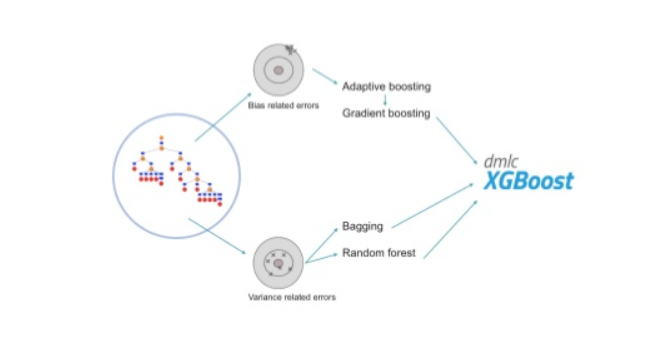

#### Model Characteristics
Types of gradient boosting supported:

    Gradient Boosting algorithm which includes the learning rate.
    Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
    Regularized Gradient Boosting with both L1 and L2 regularization.

#### System Characteristics
The XGBoost library provides a system for use in a range of computing environments:

    Parallelization of tree construction.
    Distributed Computing for training very large models using a cluster.
    Out-of-Core Computing for very large datasets that don’t fit into memory.

#### Algorithm Characteristics
The key algorithm implementation features include:

    Sparse Aware implementation with automatic handling of missing data values.
    Block Structure to support the parallelization of tree construction.
    Continued Training so that we can further boost an already fitted model on new data.

#### Why are we using XGBoost?
    1. Input Type - We have both continuous and categorical variables, which is supported by XGBoost
    2. Speed - We have a very large data set, so parallelization of the code execution is required
    3. Problem Type - Our problem type is Supervised Regression problem, as supported by XGBoost
    4. Model Performance - The training data is a blackbox here. We need a model with good accuracy and less intervention
print(eval_mae(y_pred,y))
})

#### XGBoost without feature engineering

In [32]:
system.time({
y_train = log(train$loss)
train$loss = NULL

ntrain = nrow(train)

features = names(train)

for (f in features) {
  if (class(train[[f]])=="character") {
    #cat("VARIABLE : ",f,"\n")
    levels <- unique(train[[f]])
    train[[f]] <- as.integer(factor(train[[f]], levels=levels))
  }
}

x_train = train[1:ntrain,]

dtrain = xgb.DMatrix(data.matrix(x_train), label=y_train)

xgb_params = list(
  seed = 0,
  colsample_bytree = 0.7,
  subsample = 0.7,
  eta = 0.08,
  objective = 'reg:linear',
  max_depth = 6,
  num_parallel_tree = 1,
  min_child_weight = 1,
  base_score = 7
)

xg_eval_mae <- function (yhat, dtrain) {
   y = getinfo(dtrain, "label")
   err= mae(exp(y),exp(yhat) )
   return (list(metric = "error", value = err))
}

res = xgb.cv(xgb_params,
             dtrain,
             nrounds=750,
             nfold=4,
             early_stopping_rounds=15,
             print_every_n = 10,
             verbose= 1,
             feval=xg_eval_mae,
             maximize=FALSE)

best_nrounds = res$best_iteration
cv_mean = res$evaluation_log$test_error_mean[best_nrounds]
cv_std = res$evaluation_log$test_error_std[best_nrounds]
cat(paste0('CV-Mean: ',cv_mean,' ', cv_std))

gbdt = xgb.train(xgb_params, dtrain, nrounds=best_nrounds, feval = xg_eval_mae, verbose = 1, maximize = F)
})

[1]	train-error:2030.148383+1.484971	test-error:2030.204478+4.147009 
Multiple eval metrics are present. Will use test_error for early stopping.
Will train until test_error hasn't improved in 15 rounds.

[11]	train-error:1617.873415+1.204113	test-error:1620.263119+3.751261 
[21]	train-error:1384.646254+1.222222	test-error:1391.130540+2.873825 
[31]	train-error:1274.526305+1.302258	test-error:1285.229311+2.547065 
[41]	train-error:1220.187599+2.012460	test-error:1234.906418+1.374197 
[51]	train-error:1189.523828+2.065133	test-error:1207.535505+0.827073 
[61]	train-error:1169.965278+1.608050	test-error:1191.270984+0.426294 
[71]	train-error:1157.281578+1.553142	test-error:1181.204294+0.454027 
[81]	train-error:1147.733238+1.668248	test-error:1174.320132+0.313802 
[91]	train-error:1140.043964+1.614252	test-error:1169.169450+0.303717 
[101]	train-error:1133.751560+1.540306	test-error:1165.436011+0.308093 
[111]	train-error:1128.555778+1.614717	test-error:1162.935600+0.685931 
[121]	train-e

    user   system  elapsed 
3024.256    3.764  447.164 

### Choosing scoring metrics

To assess the correctness of our model we used MAE (Mean Absolute Error) which was an official metric for challenge model assesment and is given by the formula:

$$MAE = \sum_{i=1}^{n} \frac{|y_i - x_i|}{n}$$

## 9. Conclusions

In this project we were trying to predict the loss of a insurance claim based on anonimized data provided by Allstate insurance company. This data set consits of a huge number of variables 14 continous and 116 categorical this amount of variables requires a lot of exploratory analysis. 

Before we started to design the model we looked for the existing kernels on Kaggle, it turns out that the most powerfull model was gradient boosting implemented with XGBoost library - we decided to use this model. First step was to choose some baseline model that would provide us a reference of performance to our model. We chose two predictors first one very naive and simple - just a model that predicts mean loss for every observation and the other the Multi Linear Regression model.

|Model|MAE|time|
|---|---|---|
|naive predictor|1809.837|0.019|
|MLR|1294.606|23.394|
|XGBoost simple|1146|547.672|
|XGBoost + feature engineering|?|?|

## 10. References

- Greedy Function Approximation: A Gradient Boosting Machine, by Friedman (https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)
- Data Valorization course slides: Data Gathering by Lionel Fillatre (fillatre@unice.fr)